In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
with open("../prp_summary_wn.csv","r") as fd:
    lines=fd.readlines()

summary_uw=[]
summary_uw_header=[]
for line in lines:
    larr=line.strip().split(',')
    if len(larr)!=13:
        print(len(larr))
        continue #bad line
    if larr[0][0]=='#':
        summary_uw_header=larr
    else:
        summary_uw.append(larr)

In [3]:
i_n_samples=1
i_n_embs=2
i_gpu7=4
i_gpu8=6
i_gpu28=8
i_gpu39=10
i_gpu40=12

In [4]:
gpu7_n_samples=[]
gpu8_n_samples=[]
gpu28_n_samples=[]
gpu39_n_samples=[]
gpu40_n_samples=[]

n_embs=[]
gpu7=[]
gpu8=[]
gpu28=[]
gpu39=[]
gpu40=[]

for el in summary_uw:
    n_samples=int(el[i_n_samples])
    n_embs.append(int(el[i_n_embs]))
    if el[i_gpu7]!='':
        gpu7_n_samples.append(int(el[i_n_samples]))
        gpu7.append(int(el[i_gpu7])/60.0)
    if el[i_gpu8]!='':
        gpu8_n_samples.append(int(el[i_n_samples]))
        gpu8.append(int(el[i_gpu8])/60.0)
    if el[i_gpu28]!='':
        gpu28_n_samples.append(int(el[i_n_samples]))
        gpu28.append(int(el[i_gpu28])/60.0)
    if el[i_gpu39]!='':
        gpu39_n_samples.append(int(el[i_n_samples]))
        gpu39.append(int(el[i_gpu39])/60.0)
    if el[i_gpu40]!='':
        gpu40_n_samples.append(int(el[i_n_samples]))
        gpu40.append(int(el[i_gpu40])/60.0)

    

In [5]:
#x = n_samples
#y = np.vstack([org_cpu,cpu,gpu_3s])
print(gpu40_n_samples)

[1000, 2000, 5000, 10000, 20000, 30000, 50000, 100000, 200000, 307237]


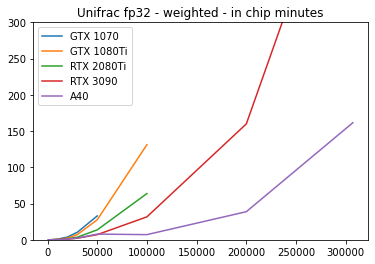

In [6]:
fig, ax = plt.subplots()
#ax.plot(n_samples[:len(org_cpu)], org_cpu,
#        n_samples[:len(cpu)], cpu,
#        n_samples[:len(gpu_3s)], gpu_3s)
ax.plot(gpu7_n_samples, gpu7, label="GTX 1070")
ax.plot(gpu8_n_samples, gpu8, label="GTX 1080Ti")
ax.plot(gpu28_n_samples, gpu28, label="RTX 2080Ti")
ax.plot(gpu39_n_samples, gpu39, label="RTX 3090")
ax.plot(gpu40_n_samples, gpu40, label="A40")


plt.ylim([0,300])

plt.title("Unifrac fp32 - weighted - in chip minutes")
ax.legend(loc='upper left')
plt.show()
